# Baseline Performance Evaluation

This notebook establishes **baseline performance metrics** for age and gender prediction tasks using simple heuristic methods. These baselines provide essential reference points for evaluating the effectiveness of more sophisticated BERT-based approaches.

## Baseline Methods

### 1. Random Classifier
- **Strategy**: Random prediction based on class distribution
- **Purpose**: Lower bound for meaningful model performance
- **Implementation**: Uniform sampling from available class labels

### 2. Majority Class Classifier  
- **Strategy**: Always predict the most frequent class
- **Purpose**: Simple but often effective baseline for imbalanced datasets
- **Implementation**: Single prediction based on training set mode

## Evaluation Framework
- **Joint Accuracy**: Percentage of samples where both age and gender are predicted correctly
- **Individual Task Accuracy**: Separate evaluation for age and gender prediction
- **Average Accuracy**: Mean performance across both demographic attributes

## Research Value
These baselines help determine:
- **Minimum Performance Requirements**: Any model should exceed these simple methods
- **Task Difficulty Assessment**: How challenging the demographic prediction tasks are
- **Model Validation**: Whether complex models provide meaningful improvements

In [2]:
import pandas as pd

DATA_PATH = "/home/jovyan/work/ULM-25-authorship-profiling/data/"

df_train = pd.read_csv(DATA_PATH + "data_train.csv")
df_test = pd.read_csv(DATA_PATH + "data_test.csv")
df_val = pd.read_csv(DATA_PATH + "data_val.csv")

In [1]:
import random
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

class BaselineClassifier:
    
    def __init__(self, train_set, test_set):
        self.train_set = train_set
        self.test_set = test_set

    @property
    def random(self):
        preds_age, targets_age, preds_gender, targets_gender = self._random_clf()
        age_acc, gender_acc, joint_acc, avg_acc = self.compute_acc(preds_age, targets_age, preds_gender, targets_gender)
        return {
            "age_acc": age_acc,
            "gender_acc": gender_acc,
            "joint_acc": joint_acc,
            "avg_acc": avg_acc
        }

    @property
    def majority(self):
        preds_age, targets_age, preds_gender, targets_gender = self._majority_clf()
        age_acc, gender_acc, joint_acc, avg_acc = self.compute_acc(preds_age, targets_age, preds_gender, targets_gender)
        return {
            "age_acc": age_acc,
            "gender_acc": gender_acc,
            "joint_acc": joint_acc,
            "avg_acc": avg_acc
        }
    

    def _majority_clf(self):
        targets_age = self.test_set.age.to_list()
        targets_gender = self.test_set.gender.to_list()
        majority_age_class = self.train_set.age.mode()[0]
        preds_age = [majority_age_class] * len(targets_age)
        majority_gender_class = self.train_set.gender.mode()[0]
        preds_gender = [majority_gender_class] * len(targets_gender)
        return preds_age, targets_age, preds_gender, targets_gender
    
    def _random_clf(self):
        age_labels = list(self.test_set.age.unique())
        num_age_labels = len(age_labels)
        gender_labels = self.test_set.gender.unique()
        num_gender_labels = 2
        targets_age = self.test_set.age.to_list()
        targets_gender = self.test_set.gender.to_list()
        preds_age = [random.choice(age_labels) for i in range(len(targets_age))]
        preds_gender = [random.choice(gender_labels) for i in range(len(targets_gender))]
        return preds_age, targets_age, preds_gender, targets_gender
    
    def compute_acc(self, preds_age, targets_age, preds_gender, targets_gender):
        age_acc = accuracy_score(targets_age, preds_age)
        gender_acc = accuracy_score(targets_gender, preds_gender)
        # to np arrays
        preds_age = np.array(preds_age)
        targets_age = np.array(targets_age)
        preds_gender = np.array(preds_gender)
        targets_gender = np.array(targets_gender)
        
        joint_acc = np.mean((preds_age == targets_age) & (preds_gender == targets_gender))
        avg_acc = (gender_acc + age_acc) / 2
        return age_acc, gender_acc, float(joint_acc), avg_acc
        

In [3]:
baseline = BaselineClassifier(df_train, df_test)
random_baseline = baseline.random
print(random_baseline)

{'age_acc': 0.1435955589546138, 'gender_acc': 0.5040481025343495, 'joint_acc': 0.07175822147208523, 'avg_acc': 0.3238218307444817}


In [4]:
majority_baseline = baseline.majority
print(majority_baseline)

{'age_acc': 0.39919301669347823, 'gender_acc': 0.5374350589414277, 'joint_acc': 0.24449484427331944, 'avg_acc': 0.46831403781745296}


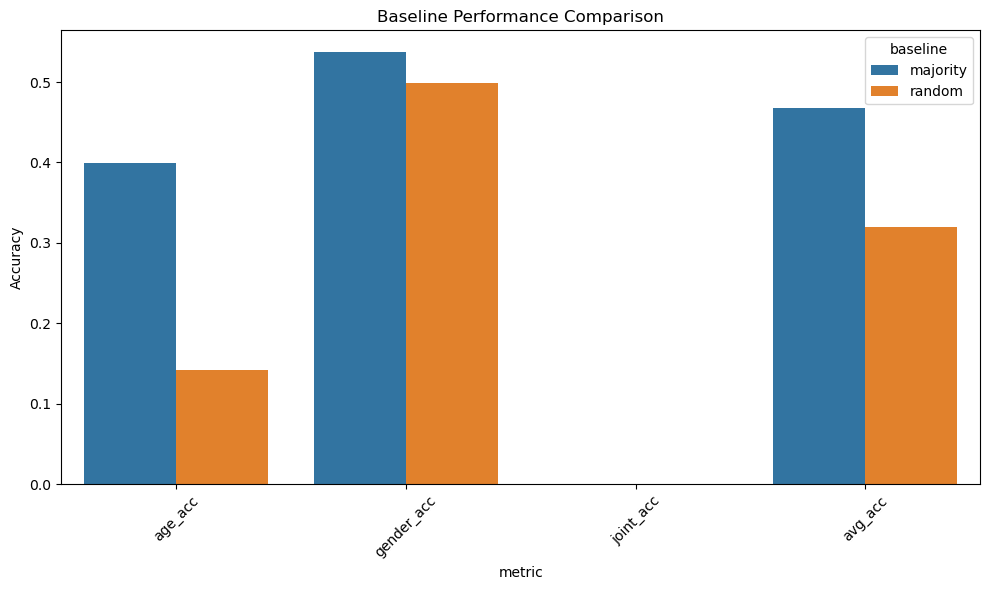

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

data = []
for metric, value in majority_baseline.items():
    data.append({'metric': metric, 'accuracy': value, 'baseline': 'majority'})
for metric, value in random_baseline.items():
    data.append({'metric': metric, 'accuracy': value, 'baseline': 'random'})
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='metric', y='accuracy', hue='baseline')
plt.title('Baseline Performance Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()